In [56]:
 # we are using parallel workflow and update in runs parameter is not expected ...parallel update is not expected 
# Langgraph think that all attributes were changed so that why it throw error 
# so we wont send full state insted we sent partial state 
# when we are work
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [57]:
class CricketState(TypedDict):
    runs : int 
    balls:int 
    fours:int
    sixes:int 

    sr:float
    bpb:float
    boundry_percent:float
    summary:str

In [58]:
def calculate_sr(state:CricketState)->CricketState:
    runs=state["runs"]
    balls=state['balls']
    sr=(runs/balls)*100
    state["sr"]=sr
    return {"sr":sr}

def calculate_bpb(state:CricketState)->CricketState:
    bpb=(state["runs"]/(state["fours"] + state["sixes"]))
    state["bpb"]=bpb
    return { "bpb":bpb }
    
    

def calculate_boundry_percent(state:CricketState)->CricketState:
    boundry_percent=((state["fours"]*4 +state["sixes"]*6 )/state["runs"])*100
    state["boundry_percent"]=boundry_percent
    return { "boundry_percent" : boundry_percent}

def summary_of_player(state:CricketState)->CricketState:
    summary=f"""this is the summary of player 
             strike rate : {state["sr"]}
             bpb : {state["bpb"]}
             boundary_percent:{state["boundry_percent"]}
             """
    state["summary"] = summary
    return {"summary" :  summary}


In [59]:
graph=StateGraph(CricketState)
graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_boundry_percent",calculate_boundry_percent)
graph.add_node("summary_of_player",summary_of_player)

In [60]:
# add edges 
graph.add_edge(START,"calculate_sr")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_boundry_percent")

graph.add_edge("calculate_sr","summary_of_player")
graph.add_edge("calculate_bpb","summary_of_player")
graph.add_edge("calculate_boundry_percent", "summary_of_player")

graph.add_edge("summary_of_player",END)
               


In [61]:
workflow=graph.compile()

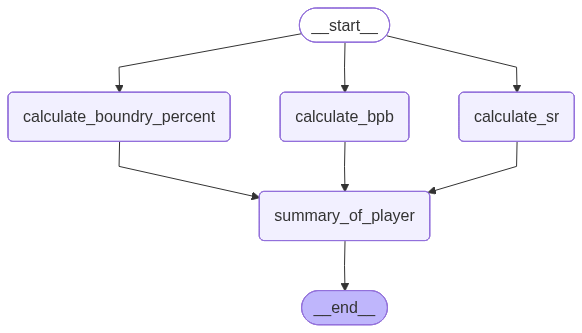

In [62]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [63]:
initial_state={"runs":25,"balls":26,"fours":2,"sixes":2}

In [64]:

final_state=workflow.invoke(initial_state)

In [65]:
final_state

{'runs': 25,
 'balls': 26,
 'fours': 2,
 'sixes': 2,
 'sr': 96.15384615384616,
 'bpb': 6.25,
 'boundry_percent': 80.0,
 'summary': 'this is the summary of player \n             strike rate : 96.15384615384616\n             bpb : 6.25\n             boundary_percent:80.0\n             '}